In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING THE DATA SET

In [3]:
ysrcp_train = pd.read_csv(r"dataset\manifestios\ysrcp_mani_train.csv")
tdp_train   = pd.read_csv(r"dataset\manifestos\tdp_mani_train.csv")

# DATA ANALYSIS

### YSRCP

In [4]:
ysrcp_train.head()

,Unnamed: 0,Comments,Emotion
0,0,vidyadeevana pada is a moga padai keech,Negative
1,1,yet the vasathi deevena amount not released bu...,Positive
2,2,thanks for vidya deewana,Positive
3,3,it is a waste of time and pressure on students...,Negative
4,4,think ones,Positive


In [5]:
ysrcp_train.describe()

,Unnamed: 0
count,3020.000000
mean,1618.477815
std,923.274786
min,0.000000
25%,821.750000
50%,1624.500000
75%,2427.250000
max,3210.000000


In [6]:
ysrcp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3020 non-null   int64 
 1   Comments    3019 non-null   object
 2   Emotion     3020 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.9+ KB


In [7]:
ysrcp_train.columns

Index(['Unnamed: 0', 'Comments', 'Emotion'], dtype='object')

In [8]:
ysrcp_train.shape

(3020, 3)

### TDP

In [9]:
tdp_train.head()

,Unnamed: 0,Comments,Emotion
0,0,yes brother in our village landless persons al...,Negative
1,1,sir me nanna perumeeda vunna polamki vesuntaru...,Negative
2,2,"bro("""""" vote for note"""""" )new scheme",Positive
3,3,pls complaint to ec and take this matter very ...,Negative
4,4,well said bro people who believes that cbn is ...,Negative


In [10]:
tdp_train.describe()

,Unnamed: 0
count,4816.000000
mean,2407.500000
std,1390.403778
min,0.000000
25%,1203.750000
50%,2407.500000
75%,3611.250000
max,4815.000000


In [11]:
tdp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4816 non-null   int64 
 1   Comments    4815 non-null   object
 2   Emotion     4816 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.0+ KB


In [12]:
tdp_train.columns

Index(['Unnamed: 0', 'Comments', 'Emotion'], dtype='object')

In [13]:
tdp_train.shape

(4816, 3)

# CHECKING FOR NULL VALUES

### YSRCP

In [14]:
ysrcp_train.isnull().sum()

Unnamed: 0    0
Comments      1
Emotion       0
dtype: int64

In [15]:
ysrcp_train.dropna(inplace = True)

In [16]:
ysrcp_train.isnull().sum()

Unnamed: 0    0
Comments      0
Emotion       0
dtype: int64

### TDP

In [17]:
tdp_train.isnull().sum()

Unnamed: 0    0
Comments      1
Emotion       0
dtype: int64

In [18]:
tdp_train.dropna(inplace=True)

In [19]:
tdp_train.isnull().sum()

Unnamed: 0    0
Comments      0
Emotion       0
dtype: int64

# CHECKING FOR DUPLICTAES

### YSRCP

In [20]:
ysrcp_train.duplicated().sum()

0

### TDP

In [21]:
tdp_train.duplicated().sum()

0

## DATA VISUALIZATION

### YSRCP

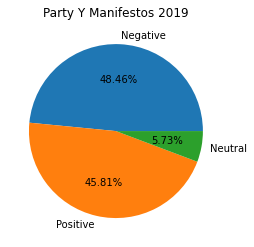

In [22]:
ysrcp_dic = {}
for i in ysrcp_train['Emotion']:
    if i in ysrcp_dic:
        ysrcp_dic[i] = ysrcp_dic[i] + 1
    else:
        ysrcp_dic[i] = 1
plt.pie(ysrcp_dic.values(),labels=ysrcp_dic.keys(),autopct='%.2f%%')
plt.title("Party Y Manifestos 2019")
plt.show()

### TDP

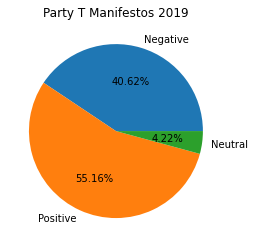

In [23]:
tdp_dic = {}
for i in tdp_train['Emotion']:
    if i in tdp_dic:
        tdp_dic[i] = tdp_dic[i] + 1
    else:
        tdp_dic[i] = 1
plt.pie(tdp_dic.values(),labels=tdp_dic.keys(),autopct='%.2f%%')
plt.title("Party T Manifestos 2019")
plt.show()

In [23]:
num_ysrcp_emotion = []
for i in ysrcp_train['Emotion']:
    if i=='Positive':
        num_ysrcp_emotion.append(1.0)
    elif i=='Negative':
        num_ysrcp_emotion.append(0.0)
    else:
        num_ysrcp_emotion.append(2.0)
ysrcp_train['num_emotion'] = num_ysrcp_emotion

In [24]:
num_tdp_emotion = []
for i in tdp_train['Emotion']:
    if i=='Positive':
        num_tdp_emotion.append(1.0)
    elif i=='Negative':
        num_tdp_emotion.append(0.0)
    else:
        num_tdp_emotion.append(2.0)
tdp_train['num_emotion'] = num_tdp_emotion

## DATA PREPROCESSING

In [25]:
import re
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

C:\Users\posah\anacondap\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
lm = WordNetLemmatizer()
sw = stopwords.words('English')

In [27]:
ysrcp_comments = []
ysrcp_max_len = 0
ysrcp_unique = set()
for i in ysrcp_train['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [k for k in p if k not in sw]
    p = [lm.lemmatize(k) for k in p]
    ysrcp_unique = ysrcp_unique | set(p)
    ysrcp_max_len = max(len(p),ysrcp_max_len)
    p = ' '.join(p)
    if p=='':
        ysrcp_comments.append(np.nan)
    else:
        ysrcp_comments.append(p)
print('DONE')
print("Maximum length of sentence : ",ysrcp_max_len)
ysrcp_n_words = len(ysrcp_unique)
print("Maximum number of words : ",ysrcp_n_words)

DONE
Maximum length of sentence :  241
Maximum number of words :  7211


In [28]:
ysrcp_train['pre_pro_comm'] = ysrcp_comments

In [29]:
ysrcp_train.isnull().sum()

Unnamed: 0       0
Comments         0
Emotion          0
num_emotion      0
pre_pro_comm    13
dtype: int64

In [30]:
ysrcp_train.dropna(inplace = True)

In [31]:
ysrcp_train.isnull().sum()

Unnamed: 0      0
Comments        0
Emotion         0
num_emotion     0
pre_pro_comm    0
dtype: int64

In [32]:
ysrcp_train.shape

(3006, 5)

### TDP

In [33]:
tdp_comments = []
tdp_max_len = 0
tdp_unique = set()
for i in tdp_train['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [i for i in p if i not in sw]
    p = [lm.lemmatize(i) for i in p]
    tdp_unique = tdp_unique | set(p)
    tdp_max_len = max(len(p),tdp_max_len)
    p = ' '.join(p)
    p = re.sub(' +',' ',p)
    if p=='':
        tdp_comments.append(np.nan)
    else:
        tdp_comments.append(p)
print('DONE')
print("Maximum length of sentence : ",tdp_max_len)
tdp_n_words = len(tdp_unique)
print("Maximum number of words : ",tdp_n_words)

DONE
Maximum length of sentence :  153
Maximum number of words :  8838


In [34]:
tdp_train['pre_pro_comm'] = tdp_comments

In [35]:
tdp_train.isnull().sum()

Unnamed: 0       0
Comments         0
Emotion          0
num_emotion      0
pre_pro_comm    52
dtype: int64

In [36]:
tdp_train.dropna(inplace = True)

In [37]:
tdp_train.isnull().sum()

Unnamed: 0      0
Comments        0
Emotion         0
num_emotion     0
pre_pro_comm    0
dtype: int64

In [38]:
tdp_train.shape

(4763, 5)

# Transforming the words into vectors using tf-idf

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tf_idf = TfidfVectorizer()

### YSRCP

In [41]:
ysrcp_features = tf_idf.fit_transform(ysrcp_train['pre_pro_comm']).toarray()
print(ysrcp_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### TDP

In [42]:
tdp_features = tf_idf.fit_transform(tdp_train['pre_pro_comm']).toarray()
print(tdp_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# X & Y ARRAY

### YSRCP

In [43]:
ysrcp_x = ysrcp_features
ysrcp_y = ysrcp_train.iloc[:,-2]
print(ysrcp_x.shape,ysrcp_y.shape)
print(type(ysrcp_x),type(ysrcp_y))

(3006, 7195) (3006,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [44]:
ysrcp_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
ysrcp_y

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
3015    1.0
3016    1.0
3017    0.0
3018    1.0
3019    0.0
Name: num_emotion, Length: 3006, dtype: float64

### TDP

In [46]:
tdp_x = tdp_features
tdp_y = tdp_train.iloc[:,-2]
print(tdp_x.shape,tdp_y.shape)
print(type(tdp_x),type(tdp_y))

(4763, 8817) (4763,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [47]:
tdp_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
tdp_y

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
4811    1.0
4812    0.0
4813    1.0
4814    0.0
4815    1.0
Name: num_emotion, Length: 4763, dtype: float64

# Spliting data into training and testing

In [49]:
from sklearn.model_selection import train_test_split

### YSRCP

In [50]:
ysrcp_x_train,ysrcp_x_test,ysrcp_y_train,ysrcp_y_test = \
        train_test_split(ysrcp_x,ysrcp_y,test_size=0.25,random_state=42)

In [51]:
print(ysrcp_x_train)
print(ysrcp_x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
print(ysrcp_y_train,ysrcp_y_test)

2249    0.0
788     0.0
1601    1.0
266     1.0
816     2.0
       ... 
1649    1.0
1102    0.0
1137    1.0
1303    1.0
867     0.0
Name: num_emotion, Length: 2254, dtype: float64 751     0.0
684     0.0
2300    1.0
2498    1.0
949     1.0
       ... 
2065    1.0
2001    1.0
104     1.0
320     1.0
2224    1.0
Name: num_emotion, Length: 752, dtype: float64


In [53]:
print(ysrcp_x_train.shape,ysrcp_x_test.shape)
print(ysrcp_y_train.shape,ysrcp_y_test.shape)

(2254, 7195) (752, 7195)
(2254,) (752,)


### TDP

In [54]:
tdp_x_train,tdp_x_test,tdp_y_train,tdp_y_test = \
        train_test_split(tdp_x,tdp_y,test_size=0.25,random_state=42)

In [55]:
print(tdp_x_train)
print(tdp_x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
print(tdp_y_train,tdp_y_test)

2841    1.0
820     1.0
1002    1.0
4611    0.0
2532    1.0
       ... 
4476    0.0
471     0.0
3138    1.0
3819    0.0
873     1.0
Name: num_emotion, Length: 3572, dtype: float64 840     0.0
1089    1.0
1267    1.0
3612    0.0
1455    0.0
       ... 
1879    1.0
2013    2.0
2348    1.0
2259    0.0
1917    1.0
Name: num_emotion, Length: 1191, dtype: float64


# MODEL TRAINING

### YSRCP

1. `Multinomial Naive Bayes`

In [57]:
from sklearn.naive_bayes import MultinomialNB
ysrcp_mnb = MultinomialNB()
ysrcp_mnb.fit(ysrcp_x_train,ysrcp_y_train)

MultinomialNB()

In [58]:
ysrcp_mnb_pred = ysrcp_mnb.predict(ysrcp_x_test)
ysrcp_mnb_pred

array([1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0.

In [59]:
print('Training score : ',ysrcp_mnb.score(ysrcp_x_train,ysrcp_y_train))
print('Testing score  : ',ysrcp_mnb.score(ysrcp_x_test,ysrcp_y_test))

Training score :  0.8451641526175687
Testing score  :  0.636968085106383


In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [61]:
ysrcp_mnb_acc = accuracy_score(ysrcp_y_test,ysrcp_mnb_pred)
ysrcp_mnb_pr  = precision_score(ysrcp_y_test,ysrcp_mnb_pred,average='macro',zero_division=0.0)
ysrcp_mnb_rec = recall_score(ysrcp_y_test,ysrcp_mnb_pred,average='macro',zero_division=0.0)
ysrcp_mnb_f1  = f1_score(ysrcp_y_test,ysrcp_mnb_pred,average='macro',zero_division=0.0)
print('Accuracy by MNB  : ', ysrcp_mnb_acc)
print('Precision by MNB : ', ysrcp_mnb_pr)
print('Recall by MNB    : ', ysrcp_mnb_rec)
print('F1 score by MNB  : ', ysrcp_mnb_f1)

Accuracy by MNB  :  0.636968085106383
Precision by MNB :  0.4239472154056904
Recall by MNB    :  0.4408884580708035
F1 score by MNB  :  0.4300924035509581


In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(confusion_matrix(ysrcp_y_test,ysrcp_mnb_pred))
print(classification_report(ysrcp_y_test,ysrcp_mnb_pred))

[[291  92   0]
 [146 188   0]
 [ 17  18   0]]
              precision    recall  f1-score   support

         0.0       0.64      0.76      0.70       383
         1.0       0.63      0.56      0.59       334
         2.0       0.00      0.00      0.00        35

    accuracy                           0.64       752
   macro avg       0.42      0.44      0.43       752
weighted avg       0.61      0.64      0.62       752



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. `Gaussian Navies Bayes`

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
ysrcp_gnb = GaussianNB()
ysrcp_gnb.fit(ysrcp_x_train,ysrcp_y_train)

GaussianNB()

In [66]:
ysrcp_gnb_pred = ysrcp_gnb.predict(ysrcp_x_test)
ysrcp_gnb_pred

array([0., 0., 2., 0., 2., 1., 0., 1., 0., 0., 2., 1., 2., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 2., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 2., 1., 0., 1., 1., 2., 2., 1.,
       2., 0., 2., 1., 2., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       2., 0., 1., 0., 2., 2., 2., 0., 2., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 2., 2., 0., 2., 1., 1., 0., 0., 1.,
       1., 0., 2., 2., 2., 1., 2., 1., 0., 1., 1., 0., 2., 1., 0., 2., 0.,
       1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 2., 0., 1., 0., 0., 0., 2., 1., 1., 0., 1., 0., 2., 1., 1.,
       2., 1., 0., 0., 1., 1., 1., 2., 1., 0., 0., 1., 1., 0., 1., 2., 2.,
       1., 1., 0., 2., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 2., 0., 1.,
       1., 1., 1., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 2., 0., 1., 0., 1., 0., 0., 1., 1., 2., 0., 0.,
       0., 0., 2., 0., 0.

In [67]:
print("Training Score : ",ysrcp_gnb.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_gnb.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.8061224489795918
Testing Score  :  0.4640957446808511


In [68]:
ysrcp_gnb_acc = accuracy_score(ysrcp_y_test,ysrcp_gnb_pred)
ysrcp_gnb_pr  = precision_score(ysrcp_y_test,ysrcp_gnb_pred,average='macro')
ysrcp_gnb_rec = recall_score(ysrcp_y_test,ysrcp_gnb_pred,average='macro')
ysrcp_gnb_f1  = f1_score(ysrcp_y_test,ysrcp_gnb_pred,average='macro')
print('Accuracy by MNB  : ', ysrcp_gnb_acc)
print('Precision by MNB : ', ysrcp_gnb_pr)
print('Recall by MNB    : ', ysrcp_gnb_rec)
print('F1 score by MNB  : ', ysrcp_gnb_f1)

Accuracy by MNB  :  0.4640957446808511
Precision by MNB :  0.39913690600428037
Recall by MNB    :  0.3939101282701289
F1 score by MNB  :  0.3736042213382415


In [69]:
print(confusion_matrix(ysrcp_y_test,ysrcp_gnb_pred))
print(classification_report(ysrcp_y_test,ysrcp_gnb_pred))

[[177 147  59]
 [ 86 164  84]
 [ 15  12   8]]
              precision    recall  f1-score   support

         0.0       0.64      0.46      0.54       383
         1.0       0.51      0.49      0.50       334
         2.0       0.05      0.23      0.09        35

    accuracy                           0.46       752
   macro avg       0.40      0.39      0.37       752
weighted avg       0.55      0.46      0.50       752



3. `Logistic Regression`

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
ysrcp_lr = LogisticRegression()
ysrcp_lr.fit(ysrcp_x_train,ysrcp_y_train)

LogisticRegression()

In [72]:
ysrcp_lr_pred = ysrcp_lr.predict(ysrcp_x_test)
ysrcp_lr_pred

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1.

In [73]:
print("Training Score : ",ysrcp_lr.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_lr.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.8669032830523514
Testing Score  :  0.6529255319148937


In [74]:
ysrcp_lr_acc = accuracy_score(ysrcp_y_test,ysrcp_lr_pred)
ysrcp_lr_pr  = precision_score(ysrcp_y_test,ysrcp_lr_pred,average='macro',zero_division=0.0)
ysrcp_lr_rec = recall_score(ysrcp_y_test,ysrcp_lr_pred,average='macro',zero_division=0.0)
ysrcp_lr_f1  = f1_score(ysrcp_y_test,ysrcp_lr_pred,average='macro',zero_division=0.0)
print('Accuracy by MNB  : ', ysrcp_lr_acc)
print('Precision by MNB : ', ysrcp_lr_pr)
print('Recall by MNB    : ', ysrcp_lr_rec)
print('F1 score by MNB  : ', ysrcp_lr_f1)

Accuracy by MNB  :  0.6529255319148937
Precision by MNB :  0.4339208773991383
Recall by MNB    :  0.45490741754089736
F1 score by MNB  :  0.444144093759127


In [75]:
print(confusion_matrix(ysrcp_y_test,ysrcp_lr_pred))
print(classification_report(ysrcp_y_test,ysrcp_lr_pred))

[[275 108   0]
 [118 216   0]
 [ 14  21   0]]
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       383
         1.0       0.63      0.65      0.64       334
         2.0       0.00      0.00      0.00        35

    accuracy                           0.65       752
   macro avg       0.43      0.45      0.44       752
weighted avg       0.62      0.65      0.64       752



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. `Linear Discriminant Analysis`

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
ysrcp_lda = LinearDiscriminantAnalysis()
ysrcp_lda.fit(ysrcp_x_train,ysrcp_y_train)

LinearDiscriminantAnalysis()

In [78]:
ysrcp_lda_pred = ysrcp_lda.predict(ysrcp_x_test)
ysrcp_lda_pred

array([1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 2., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 2., 2., 2., 0., 2., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 2., 0., 2., 2., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 2., 0., 1., 1., 2., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 2., 1., 1., 1., 1., 1., 1., 2., 0., 0., 2., 1., 1.,
       2., 1., 2., 0., 0., 0., 2., 0., 0., 1., 0., 1., 1., 1., 2., 1., 1.,
       1., 0., 0., 1., 0., 2., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 2.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 2., 0., 2., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0.

In [79]:
print("Training Score : ",ysrcp_lda.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_lda.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9884649511978705
Testing Score  :  0.5279255319148937


In [80]:
ysrcp_lda_acc = accuracy_score(ysrcp_y_test,ysrcp_lda_pred)
ysrcp_lda_pr  = precision_score(ysrcp_y_test,ysrcp_lda_pred,average='macro',zero_division=0.0)
ysrcp_lda_rec = recall_score(ysrcp_y_test,ysrcp_lda_pred,average='macro',zero_division=0.0)
ysrcp_lda_f1  = f1_score(ysrcp_y_test,ysrcp_lda_pred,average='macro',zero_division=0.0)
print('Accuracy by lda  : ', ysrcp_lda_acc)
print('Precision by lda : ', ysrcp_lda_pr)
print('Recall by lda    : ', ysrcp_lda_rec)
print('F1 score by lda  : ', ysrcp_lda_f1)

Accuracy by lda  :  0.5279255319148937
Precision by lda :  0.4325046315434906
Recall by lda    :  0.466242598726456
F1 score by lda  :  0.4321747992212736


In [81]:
print(confusion_matrix(ysrcp_y_test,ysrcp_lda_pred))
print(classification_report(ysrcp_y_test,ysrcp_lda_pred))

[[186 152  45]
 [102 200  32]
 [  7  17  11]]
              precision    recall  f1-score   support

         0.0       0.63      0.49      0.55       383
         1.0       0.54      0.60      0.57       334
         2.0       0.12      0.31      0.18        35

    accuracy                           0.53       752
   macro avg       0.43      0.47      0.43       752
weighted avg       0.57      0.53      0.54       752



5. `Decision Tree`

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
ysrcp_dt = DecisionTreeClassifier()
ysrcp_dt.fit(ysrcp_x_train,ysrcp_y_train)

DecisionTreeClassifier()

In [84]:
ysrcp_dt_pred = ysrcp_dt.predict(ysrcp_x_test)
ysrcp_dt_pred

array([2., 1., 2., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 2., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 2., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 2., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 2., 1., 2.,
       0., 0., 2., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 2., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 2., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 2., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0.

In [85]:
print("Training Score : ",ysrcp_dt.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_dt.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9982253771073647
Testing Score  :  0.5904255319148937


In [86]:
ysrcp_dt_acc = accuracy_score(ysrcp_y_test,ysrcp_dt_pred)
ysrcp_dt_pr  = precision_score(ysrcp_y_test,ysrcp_dt_pred,average='macro')
ysrcp_dt_rec = recall_score(ysrcp_y_test,ysrcp_dt_pred,average='macro')
ysrcp_dt_f1  = f1_score(ysrcp_y_test,ysrcp_dt_pred,average='macro')
print('Accuracy by dt  : ', ysrcp_dt_acc)
print('Precision by dt : ', ysrcp_dt_pr)
print('Recall by dt    : ', ysrcp_dt_rec)
print('F1 score by dt  : ', ysrcp_dt_f1)

Accuracy by dt  :  0.5904255319148937
Precision by dt :  0.43181395734577227
Recall by dt    :  0.43156462159604697
F1 score by dt  :  0.43002031721783607


In [87]:
print(confusion_matrix(ysrcp_y_test,ysrcp_dt_pred))
print(classification_report(ysrcp_y_test,ysrcp_dt_pred))

[[224 142  17]
 [ 99 218  17]
 [ 14  19   2]]
              precision    recall  f1-score   support

         0.0       0.66      0.58      0.62       383
         1.0       0.58      0.65      0.61       334
         2.0       0.06      0.06      0.06        35

    accuracy                           0.59       752
   macro avg       0.43      0.43      0.43       752
weighted avg       0.60      0.59      0.59       752



6. `Random Forest`

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
ysrcp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
ysrcp_rf.fit(ysrcp_x_train,ysrcp_y_train)

RandomForestClassifier(random_state=42)

In [90]:
ysrcp_rf_pred = ysrcp_rf.predict(ysrcp_x_test)
ysrcp_rf_pred

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 2., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0.

In [91]:
print("Training Score : ",ysrcp_rf.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_rf.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.9982253771073647
Testing Score  :  0.6476063829787234


In [92]:
ysrcp_rf_acc = accuracy_score(ysrcp_y_test,ysrcp_rf_pred)
ysrcp_rf_pr  = precision_score(ysrcp_y_test,ysrcp_rf_pred,average='macro')
ysrcp_rf_rec = recall_score(ysrcp_y_test,ysrcp_rf_pred,average='macro')
ysrcp_rf_f1  = f1_score(ysrcp_y_test,ysrcp_rf_pred,average='macro')
print('Accuracy by rf  : ', ysrcp_rf_acc)
print('Precision by rf : ', ysrcp_rf_pr)
print('Recall by rf    : ', ysrcp_rf_rec)
print('F1 score by rf  : ', ysrcp_rf_f1)

Accuracy by rf  :  0.6476063829787234
Precision by rf :  0.4403173951706683
Recall by rf    :  0.4574271821891465
F1 score by rf  :  0.44176614075311615


In [93]:
print(confusion_matrix(ysrcp_y_test,ysrcp_rf_pred))
print(classification_report(ysrcp_y_test,ysrcp_rf_pred))

[[224 158   1]
 [ 71 263   0]
 [ 13  22   0]]
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65       383
         1.0       0.59      0.79      0.68       334
         2.0       0.00      0.00      0.00        35

    accuracy                           0.65       752
   macro avg       0.44      0.46      0.44       752
weighted avg       0.63      0.65      0.63       752



7. `Support Vector machine`

In [94]:
from sklearn.svm import SVC

In [95]:
ysrcp_svm = SVC(kernel='linear', C=1.0, random_state=42)
ysrcp_svm.fit(ysrcp_x_train,ysrcp_y_train)

SVC(kernel='linear', random_state=42)

In [96]:
ysrcp_svm_pred = ysrcp_svm.predict(ysrcp_x_test)
ysrcp_svm_pred

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1.

In [97]:
print("Training Score : ",ysrcp_svm.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_svm.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.8757763975155279
Testing Score  :  0.6502659574468085


In [98]:
ysrcp_svm_acc = accuracy_score(ysrcp_y_test,ysrcp_svm_pred)
ysrcp_svm_pr  = precision_score(ysrcp_y_test,ysrcp_svm_pred,average='macro',zero_division=0.0)
ysrcp_svm_rec = recall_score(ysrcp_y_test,ysrcp_svm_pred,average='macro',zero_division=0.0)
ysrcp_svm_f1  = f1_score(ysrcp_y_test,ysrcp_svm_pred,average='macro',zero_division=0.0)
print('Accuracy by svm  : ', ysrcp_svm_acc)
print('Precision by svm : ', ysrcp_svm_pr)
print('Recall by svm    : ', ysrcp_svm_rec)
print('F1 score by svm  : ', ysrcp_svm_f1)

Accuracy by svm  :  0.6502659574468085
Precision by svm :  0.43259223548762155
Recall by svm    :  0.45393286533981647
F1 score by svm  :  0.4429590614561713


In [99]:
print(confusion_matrix(ysrcp_y_test,ysrcp_svm_pred))
print(classification_report(ysrcp_y_test,ysrcp_svm_pred))

[[267 116   0]
 [112 222   0]
 [ 15  20   0]]
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       383
         1.0       0.62      0.66      0.64       334
         2.0       0.00      0.00      0.00        35

    accuracy                           0.65       752
   macro avg       0.43      0.45      0.44       752
weighted avg       0.62      0.65      0.64       752



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8. `KNN`

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
ysrcp_knn = KNeighborsClassifier(n_neighbors=5)
ysrcp_knn.fit(ysrcp_x_train,ysrcp_y_train)

KNeighborsClassifier()

In [102]:
ysrcp_knn_pred = ysrcp_knn.predict(ysrcp_x_test)
ysrcp_knn_pred

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 2., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1.

In [103]:
print("Training Score : ",ysrcp_knn.score(ysrcp_x_train,ysrcp_y_train))
print("Testing Score  : ",ysrcp_knn.score(ysrcp_x_test,ysrcp_y_test))

Training Score :  0.7133984028393966
Testing Score  :  0.5651595744680851


In [104]:
ysrcp_knn_acc = accuracy_score(ysrcp_y_test,ysrcp_knn_pred)
ysrcp_knn_pr  = precision_score(ysrcp_y_test,ysrcp_knn_pred,average='macro',zero_division=0.0)
ysrcp_knn_rec = recall_score(ysrcp_y_test,ysrcp_knn_pred,average='macro',zero_division=0.0)
ysrcp_knn_f1  = f1_score(ysrcp_y_test,ysrcp_knn_pred,average='macro',zero_division=0.0)
print('Accuracy by knn  : ', ysrcp_knn_acc)
print('Precision by knn : ', ysrcp_knn_pr)
print('Recall by knn    : ', ysrcp_knn_rec)
print('F1 score by knn  : ', ysrcp_knn_f1)

Accuracy by knn  :  0.5651595744680851
Precision by knn :  0.3770305738809676
Recall by knn    :  0.3954232527112876
F1 score by knn  :  0.3857290179279708


In [105]:
print(confusion_matrix(ysrcp_y_test,ysrcp_knn_pred))
print(classification_report(ysrcp_y_test,ysrcp_knn_pred))

[[225 157   1]
 [134 200   0]
 [ 22  13   0]]
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59       383
         1.0       0.54      0.60      0.57       334
         2.0       0.00      0.00      0.00        35

    accuracy                           0.57       752
   macro avg       0.38      0.40      0.39       752
weighted avg       0.54      0.57      0.55       752



9. `LSTM`

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, SpatialDropout1D, Embedding, Bidirectional, LSTM, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import pad_sequences
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [107]:
ysrcp_x_trf = [str(i) for i in ysrcp_x_train]
tokenizer = Tokenizer(num_words = ysrcp_n_words)
tokenizer.fit_on_texts(ysrcp_x_trf)

def Tokenization_padSequences(x, maxlen = ysrcp_max_len):
    xseq = tokenizer.texts_to_sequences(x)
    xpad = pad_sequences(xseq, padding='post', maxlen = ysrcp_max_len)
    return xpad

ysrcp_x_tef = [str(i) for i in ysrcp_x_test]
ysrcp_xtrain_pad = Tokenization_padSequences(ysrcp_x_trf,maxlen=ysrcp_max_len)
ysrcp_xtest_pad = Tokenization_padSequences(ysrcp_x_tef,maxlen=ysrcp_max_len)

In [108]:
ysrcp_xtrain_pad

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [109]:
Metrics = [ tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name = 'precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.F1Score(name='f1-score')]

In [110]:
ysrcp_lstm = Sequential()
ysrcp_lstm.add(Embedding(ysrcp_n_words, 64, input_length=ysrcp_max_len))
ysrcp_lstm.add(SpatialDropout1D(0.2))
ysrcp_lstm.add(Bidirectional(LSTM(256, dropout=0.2)))
ysrcp_lstm.add(Dense(1, activation ='sigmoid'))
ysrcp_lstm.compile(optimizer='Adam', metrics= Metrics, loss = 'binary_crossentropy')
ysrcp_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 241, 64)           461504    
                                                                 
 spatial_dropout1d (Spatial  (None, 241, 64)           0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 512)               657408    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1119425 (4.27 MB)
Trainable params: 1119425 (4.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
ysrcp_lstm.fit(ysrcp_xtrain_pad, ysrcp_y_train, epochs=3)

Epoch 1/3
71/71 [==============================] - 251s 4s/step - loss: 0.6829 - accuracy: 0.4601 - precision: 0.5211 - recall: 0.9974 - f1-score: 0.7358
Epoch 2/3
71/71 [==============================] - 289s 4s/step - loss: 0.6808 - accuracy: 0.4605 - precision: 0.5213 - recall: 1.0000 - f1-score: 0.7358
Epoch 3/3
71/71 [==============================] - 281s 4s/step - loss: 0.6818 - accuracy: 0.4605 - precision: 0.5213 - recall: 1.0000 - f1-score: 0.7358


In [112]:
ysrcp_lstm_pred = (ysrcp_lstm.predict(ysrcp_xtest_pad) > 0.5).astype(int)
print(confusion_matrix(ysrcp_y_test,ysrcp_lstm_pred))
print(classification_report(ysrcp_y_test, ysrcp_lstm_pred))

24/24 [==============================] - 5s 170ms/step
[[  0 383   0]
 [  0 334   0]
 [  0  35   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       383
         1.0       0.44      1.00      0.62       334
         2.0       0.00      0.00      0.00        35

    accuracy                           0.44       752
   macro avg       0.15      0.33      0.21       752
weighted avg       0.20      0.44      0.27       752



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
ysrcp_lstm_acc = accuracy_score(ysrcp_y_test, ysrcp_lstm_pred)
ysrcp_lstm_pr  = precision_score(ysrcp_y_test, ysrcp_lstm_pred,average='macro',zero_division=0.0)
ysrcp_lstm_rec = recall_score(ysrcp_y_test, ysrcp_lstm_pred,average='macro',zero_division=0.0)
ysrcp_lstm_f1  = f1_score(ysrcp_y_test, ysrcp_lstm_pred,average='macro',zero_division=0.0)
print('Accuracy by lstm  : ', ysrcp_lstm_acc)
print('Precision by lstm : ', ysrcp_lstm_pr)
print('Recall by lstm    : ', ysrcp_lstm_rec)
print('F1 score by lstm  : ', ysrcp_lstm_f1)

Accuracy by lstm  :  0.4441489361702128
Precision by lstm :  0.14804964539007093
Recall by lstm    :  0.3333333333333333
F1 score by lstm  :  0.2050337630448128


### TDP

1. `Multinomial Naive Bayes`

In [114]:
tdp_mnb = MultinomialNB()
tdp_mnb.fit(tdp_x_train,tdp_y_train)

MultinomialNB()

In [115]:
tdp_mnb_pred = tdp_mnb.predict(tdp_x_test)
tdp_mnb_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [116]:
print('Training score : ',tdp_mnb.score(tdp_x_train,tdp_y_train))
print('Testing score  : ',tdp_mnb.score(tdp_x_test,tdp_y_test))

Training score :  0.8314669652855543
Testing score  :  0.6666666666666666


In [117]:
tdp_mnb_acc = accuracy_score(tdp_y_test,tdp_mnb_pred)
tdp_mnb_pr  = precision_score(tdp_y_test,tdp_mnb_pred,average='macro',zero_division=0.0)
tdp_mnb_rec = recall_score(tdp_y_test,tdp_mnb_pred,average='macro',zero_division=0.0)
tdp_mnb_f1  = f1_score(tdp_y_test,tdp_mnb_pred,average='macro',zero_division=0.0)
print('Accuracy by mnb  : ', tdp_mnb_acc)
print('Precision by mnb : ', tdp_mnb_pr)
print('Recall by mnb    : ', tdp_mnb_rec)
print('F1 score by mnb  : ', tdp_mnb_f1)

Accuracy by mnb  :  0.6666666666666666
Precision by mnb :  0.46048987150911236
Recall by mnb    :  0.43590846738994893
F1 score by mnb  :  0.4240935857381631


In [118]:
print(confusion_matrix(tdp_y_test,tdp_mnb_pred))
print(classification_report(tdp_y_test,tdp_mnb_pred))

[[193 293   0]
 [ 59 601   0]
 [ 11  34   0]]
              precision    recall  f1-score   support

         0.0       0.73      0.40      0.52       486
         1.0       0.65      0.91      0.76       660
         2.0       0.00      0.00      0.00        45

    accuracy                           0.67      1191
   macro avg       0.46      0.44      0.42      1191
weighted avg       0.66      0.67      0.63      1191



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. `Gaussian Navies Bayes`

In [119]:
tdp_gnb = GaussianNB()
tdp_gnb.fit(tdp_x_train,tdp_y_train)

GaussianNB()

In [120]:
tdp_gnb_pred = tdp_gnb.predict(tdp_x_test)
tdp_gnb_pred

array([0., 0., 1., ..., 1., 0., 1.])

In [121]:
print("Training Score : ",tdp_gnb.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_gnb.score(tdp_x_test,tdp_y_test))

Training Score :  0.8138297872340425
Testing Score  :  0.4819479429051218


In [122]:
tdp_gnb_acc = accuracy_score(tdp_y_test,tdp_gnb_pred)
tdp_gnb_pr  = precision_score(tdp_y_test,tdp_gnb_pred,average='macro')
tdp_gnb_rec = recall_score(tdp_y_test,tdp_gnb_pred,average='macro')
tdp_gnb_f1  = f1_score(tdp_y_test,tdp_gnb_pred,average='macro')
print('Accuracy by gnb  : ', tdp_gnb_acc)
print('Precision by gnb : ', tdp_gnb_pr)
print('Recall by gnb    : ', tdp_gnb_rec)
print('F1 score by gnb  : ', tdp_gnb_f1)

Accuracy by gnb  :  0.4819479429051218
Precision by gnb :  0.4212751342536996
Recall by gnb    :  0.4001808205511909
F1 score by gnb  :  0.37829501461392173


In [123]:
print(confusion_matrix(tdp_y_test,tdp_gnb_pred))
print(classification_report(tdp_y_test,tdp_gnb_pred))

[[190 206  90]
 [112 373 175]
 [ 14  20  11]]
              precision    recall  f1-score   support

         0.0       0.60      0.39      0.47       486
         1.0       0.62      0.57      0.59       660
         2.0       0.04      0.24      0.07        45

    accuracy                           0.48      1191
   macro avg       0.42      0.40      0.38      1191
weighted avg       0.59      0.48      0.52      1191



3. `Logistic Regression`

In [124]:
tdp_lr = LogisticRegression()
tdp_lr.fit(tdp_x_train,tdp_y_train)

LogisticRegression()

In [125]:
tdp_lr_pred = tdp_lr.predict(tdp_x_test)
tdp_lr_pred

array([0., 0., 1., ..., 1., 0., 1.])

In [126]:
print("Training Score : ",tdp_lr.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_lr.score(tdp_x_test,tdp_y_test))

Training Score :  0.879619260918253
Testing Score  :  0.6859781696053736


In [127]:
tdp_lr_acc = accuracy_score(tdp_y_test,tdp_lr_pred)
tdp_lr_pr  = precision_score(tdp_y_test,tdp_lr_pred,average='macro',zero_division=0.0)
tdp_lr_rec = recall_score(tdp_y_test,tdp_lr_pred,average='macro',zero_division=0.0)
tdp_lr_f1  = f1_score(tdp_y_test,tdp_lr_pred,average='macro',zero_division=0.0)
print('Accuracy by lr  : ', tdp_lr_acc)
print('Precision by lr : ', tdp_lr_pr)
print('Recall by lr    : ', tdp_lr_rec)
print('F1 score by lr  : ', tdp_lr_f1)

Accuracy by lr  :  0.6859781696053736
Precision by lr :  0.4543114543114543
Recall by lr    :  0.462532734754957
F1 score by lr  :  0.4554302945952215


In [128]:
print(confusion_matrix(tdp_y_test,tdp_lr_pred))
print(classification_report(tdp_y_test,tdp_lr_pred))

[[276 210   0]
 [119 541   0]
 [ 19  26   0]]
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.61       486
         1.0       0.70      0.82      0.75       660
         2.0       0.00      0.00      0.00        45

    accuracy                           0.69      1191
   macro avg       0.45      0.46      0.46      1191
weighted avg       0.66      0.69      0.67      1191



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. `Linear Discriminant Analysis`

In [129]:
tdp_lda = LinearDiscriminantAnalysis()
tdp_lda.fit(tdp_x_train,tdp_y_train)

LinearDiscriminantAnalysis()

In [130]:
tdp_lda_pred = tdp_lda.predict(tdp_x_test)
tdp_lda_pred

array([0., 2., 1., ..., 1., 0., 1.])

In [131]:
print("Training Score : ",tdp_lda.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_lda.score(tdp_x_test,tdp_y_test))

Training Score :  0.9773236282194849
Testing Score  :  0.6087321578505458


In [132]:
tdp_lda_acc = accuracy_score(tdp_y_test,tdp_lda_pred)
tdp_lda_pr  = precision_score(tdp_y_test,tdp_lda_pred,average='macro')
tdp_lda_rec = recall_score(tdp_y_test,tdp_lda_pred,average='macro')
tdp_lda_f1  = f1_score(tdp_y_test,tdp_lda_pred,average='macro')
print('Accuracy by lda  : ', tdp_lda_acc)
print('Precision by lda : ', tdp_lda_pr)
print('Recall by lda    : ', tdp_lda_rec)
print('F1 score by lda  : ', tdp_lda_f1)

Accuracy by lda  :  0.6087321578505458
Precision by lda :  0.43959145056366333
Recall by lda    :  0.4371679760568649
F1 score by lda  :  0.4359671891118431


In [133]:
print(confusion_matrix(tdp_y_test,tdp_lda_pred))
print(classification_report(tdp_y_test,tdp_lda_pred))

[[240 213  33]
 [153 481  26]
 [ 17  24   4]]
              precision    recall  f1-score   support

         0.0       0.59      0.49      0.54       486
         1.0       0.67      0.73      0.70       660
         2.0       0.06      0.09      0.07        45

    accuracy                           0.61      1191
   macro avg       0.44      0.44      0.44      1191
weighted avg       0.61      0.61      0.61      1191



5. `Decision Tree`

In [134]:
tdp_dt = DecisionTreeClassifier()
tdp_dt.fit(tdp_x_train,tdp_y_train)

DecisionTreeClassifier()

In [135]:
tdp_dt_pred = tdp_dt.predict(tdp_x_test)
tdp_dt_pred

array([1., 0., 1., ..., 1., 0., 0.])

In [136]:
print("Training Score : ",tdp_dt.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_dt.score(tdp_x_test,tdp_y_test))

Training Score :  0.9958006718924972
Testing Score  :  0.6481947942905122


In [137]:
tdp_dt_acc = accuracy_score(tdp_y_test,tdp_dt_pred)
tdp_dt_pr  = precision_score(tdp_y_test,tdp_dt_pred,average='macro')
tdp_dt_rec = recall_score(tdp_y_test,tdp_dt_pred,average='macro')
tdp_dt_f1  = f1_score(tdp_y_test,tdp_dt_pred,average='macro')
print('Accuracy by dt  : ', tdp_dt_acc)
print('Precision by dt : ', tdp_dt_pr)
print('Recall by dt    : ', tdp_dt_rec)
print('F1 score by dt  : ', tdp_dt_f1)

Accuracy by dt  :  0.6481947942905122
Precision by dt :  0.4857462878461008
Recall by dt    :  0.47088165606684124
F1 score by dt  :  0.47510525754682803


In [138]:
print(confusion_matrix(tdp_y_test,tdp_dt_pred))
print(classification_report(tdp_y_test,tdp_dt_pred))

[[257 209  20]
 [141 510   9]
 [ 11  29   5]]
              precision    recall  f1-score   support

         0.0       0.63      0.53      0.57       486
         1.0       0.68      0.77      0.72       660
         2.0       0.15      0.11      0.13        45

    accuracy                           0.65      1191
   macro avg       0.49      0.47      0.48      1191
weighted avg       0.64      0.65      0.64      1191



6. `Random Forest`

In [139]:
tdp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
tdp_rf.fit(tdp_x_train,tdp_y_train)

RandomForestClassifier(random_state=42)

In [140]:
tdp_rf_pred = tdp_rf.predict(tdp_x_test)
tdp_rf_pred

array([0., 0., 1., ..., 1., 0., 1.])

In [141]:
print("Training Score : ",tdp_rf.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_rf.score(tdp_x_test,tdp_y_test))

Training Score :  0.9958006718924972
Testing Score  :  0.691855583543241


In [142]:
tdp_rf_acc = accuracy_score(tdp_y_test,tdp_rf_pred)
tdp_rf_pr  = precision_score(tdp_y_test,tdp_rf_pred,average='macro',zero_division=0.0)
tdp_rf_rec = recall_score(tdp_y_test,tdp_rf_pred,average='macro',zero_division=0.0)
tdp_rf_f1  = f1_score(tdp_y_test,tdp_rf_pred,average='macro',zero_division=0.0)
print('Accuracy by rf  : ', tdp_rf_acc)
print('Precision by rf : ', tdp_rf_pr)
print('Recall by rf    : ', tdp_rf_rec)
print('F1 score by rf  : ', tdp_rf_f1)

Accuracy by rf  :  0.691855583543241
Precision by rf :  0.6710065434949962
Recall by rf    :  0.4795423369497444
F1 score by rf  :  0.49077276477098913


In [143]:
print(confusion_matrix(tdp_y_test,tdp_rf_pred))
print(classification_report(tdp_y_test,tdp_rf_pred))

[[236 249   1]
 [ 74 585   1]
 [ 10  32   3]]
              precision    recall  f1-score   support

         0.0       0.74      0.49      0.59       486
         1.0       0.68      0.89      0.77       660
         2.0       0.60      0.07      0.12        45

    accuracy                           0.69      1191
   macro avg       0.67      0.48      0.49      1191
weighted avg       0.70      0.69      0.67      1191



7. `Support Vector machine`

In [144]:
tdp_svm = SVC(kernel='linear', C=1.0, random_state=42)
tdp_svm.fit(tdp_x_train,tdp_y_train)

SVC(kernel='linear', random_state=42)

In [145]:
tdp_svm_pred = tdp_svm.predict(tdp_x_test)
tdp_svm_pred

array([0., 0., 1., ..., 1., 0., 1.])

In [146]:
print("Training Score : ",tdp_svm.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_svm.score(tdp_x_test,tdp_y_test))

Training Score :  0.8902575587905935
Testing Score  :  0.6868178001679262


In [147]:
tdp_svm_acc = accuracy_score(tdp_y_test,tdp_svm_pred)
tdp_svm_pr  = precision_score(tdp_y_test,tdp_svm_pred,average='macro',zero_division=0.0)
tdp_svm_rec = recall_score(tdp_y_test,tdp_svm_pred,average='macro',zero_division=0.0)
tdp_svm_f1  = f1_score(tdp_y_test,tdp_svm_pred,average='macro',zero_division=0.0)
print('Accuracy by svm  : ', tdp_svm_acc)
print('Precision by svm : ', tdp_svm_pr)
print('Recall by svm    : ', tdp_svm_rec)
print('F1 score by svm  : ', tdp_svm_f1)

Accuracy by svm  :  0.6868178001679262
Precision by svm :  0.4553583099398097
Recall by svm    :  0.46321860581119845
F1 score by svm  :  0.45622473432851524


In [148]:
print(confusion_matrix(tdp_y_test,tdp_svm_pred))
print(classification_report(tdp_y_test,tdp_svm_pred))

[[277 209   0]
 [119 541   0]
 [ 17  28   0]]
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62       486
         1.0       0.70      0.82      0.75       660
         2.0       0.00      0.00      0.00        45

    accuracy                           0.69      1191
   macro avg       0.46      0.46      0.46      1191
weighted avg       0.66      0.69      0.67      1191



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8. `KNN`

In [149]:
tdp_knn = KNeighborsClassifier(n_neighbors=5)
tdp_knn.fit(tdp_x_train,tdp_y_train)

KNeighborsClassifier()

In [150]:
tdp_knn_pred = tdp_knn.predict(tdp_x_test)
tdp_knn_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [151]:
print("Training Score : ",tdp_knn.score(tdp_x_train,tdp_y_train))
print("Testing Score  : ",tdp_knn.score(tdp_x_test,tdp_y_test))

Training Score :  0.6013437849944009
Testing Score  :  0.581024349286314


In [152]:
tdp_knn_acc = accuracy_score(tdp_y_test,tdp_knn_pred)
tdp_knn_pr  = precision_score(tdp_y_test,tdp_knn_pred,average='macro',zero_division=0.0)
tdp_knn_rec = recall_score(tdp_y_test,tdp_knn_pred,average='macro',zero_division=0.0)
tdp_knn_f1  = f1_score(tdp_y_test,tdp_knn_pred,average='macro',zero_division=0.0)
print('Accuracy by knn  : ', tdp_knn_acc)
print('Precision by knn : ', tdp_knn_pr)
print('Recall by knn    : ', tdp_knn_rec)
print('F1 score by knn  : ', tdp_knn_f1)

Accuracy by knn  :  0.581024349286314
Precision by knn :  0.4447555449082669
Recall by knn    :  0.357631874298541
F1 score by knn  :  0.29574527632153774


In [153]:
print(confusion_matrix(tdp_y_test,tdp_knn_pred))
print(classification_report(tdp_y_test,tdp_knn_pred))

[[ 45 441   0]
 [ 13 647   0]
 [  1  44   0]]
              precision    recall  f1-score   support

         0.0       0.76      0.09      0.17       486
         1.0       0.57      0.98      0.72       660
         2.0       0.00      0.00      0.00        45

    accuracy                           0.58      1191
   macro avg       0.44      0.36      0.30      1191
weighted avg       0.63      0.58      0.47      1191



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9.  `LSTM`

In [154]:
tdp_x_trf = [str(i) for i in tdp_x_train]
tdp_x_tef = [str(i) for i in tdp_x_test]

tokenizer = Tokenizer(num_words = tdp_n_words)
tokenizer.fit_on_texts(tdp_x_trf)

def Tokenization_padSequences(x, maxlen = tdp_max_len):
    xseq = tokenizer.texts_to_sequences(x)
    xpad = pad_sequences(xseq, padding='post', maxlen = tdp_max_len)
    return xpad


tdp_xtrain_pad = Tokenization_padSequences(tdp_x_trf,maxlen=tdp_max_len)
tdp_xtest_pad = Tokenization_padSequences(tdp_x_tef,maxlen=tdp_max_len)

In [155]:
tdp_xtrain_pad

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [156]:
tdp_lstm = Sequential()
tdp_lstm.add(Embedding(tdp_n_words, 64, input_length=tdp_max_len))
tdp_lstm.add(SpatialDropout1D(0.2))
tdp_lstm.add(Bidirectional(LSTM(256, dropout=0.2)))
tdp_lstm.add(Dense(1, activation ='sigmoid'))
tdp_lstm.compile(optimizer='Adam', metrics= Metrics, loss = 'binary_crossentropy')
tdp_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 153, 64)           565632    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 153, 64)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               657408    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1223553 (4.67 MB)
Trainable params: 1223553 (4.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
tdp_lstm.fit(tdp_xtrain_pad, tdp_y_train, epochs=3)

Epoch 1/3
112/112 [==============================] - 107s 931ms/step - loss: 0.6600 - accuracy: 0.5146 - precision: 0.5652 - recall: 1.0000 - f1-score: 0.7623
Epoch 2/3
112/112 [==============================] - 118s 1s/step - loss: 0.6582 - accuracy: 0.5487 - precision: 0.5929 - recall: 1.0000 - f1-score: 0.7784
Epoch 3/3
112/112 [==============================] - 120s 1s/step - loss: 0.6570 - accuracy: 0.5487 - precision: 0.5929 - recall: 1.0000 - f1-score: 0.7784


In [158]:
tdp_lstm_pred = (tdp_lstm.predict(tdp_xtest_pad) > 0.5).astype(int)
print(confusion_matrix(tdp_y_test,tdp_lstm_pred))
print(classification_report(tdp_y_test, tdp_lstm_pred))

38/38 [==============================] - 5s 117ms/step
[[  0 486   0]
 [  0 660   0]
 [  0  45   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       486
         1.0       0.55      1.00      0.71       660
         2.0       0.00      0.00      0.00        45

    accuracy                           0.55      1191
   macro avg       0.18      0.33      0.24      1191
weighted avg       0.31      0.55      0.40      1191



C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anacondap\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
tdp_lstm_acc = accuracy_score(tdp_y_test, tdp_lstm_pred)
tdp_lstm_pr  = precision_score(tdp_y_test, tdp_lstm_pred,average='macro',zero_division=0.0)
tdp_lstm_rec = recall_score(tdp_y_test, tdp_lstm_pred,average='macro',zero_division=0.0)
tdp_lstm_f1  = f1_score(tdp_y_test, tdp_lstm_pred,average='macro',zero_division=0.0)
print('Accuracy by lstm  : ', tdp_lstm_acc)
print('Precision by lstm : ', tdp_lstm_pr)
print('Recall by lstm    : ', tdp_lstm_rec)
print('F1 score by lstm  : ', tdp_lstm_f1)

Accuracy by lstm  :  0.5541561712846348
Precision by lstm :  0.18471872376154494
Recall by lstm    :  0.3333333333333333
F1 score by lstm  :  0.23770934629929766


In [160]:
ysrcp_x1 = {'Accuracy':[ysrcp_mnb_acc,ysrcp_gnb_acc,ysrcp_lr_acc,ysrcp_lda_acc,
                        ysrcp_dt_acc,ysrcp_rf_acc,ysrcp_svm_acc,ysrcp_knn_acc,ysrcp_lstm_acc],
      'Precision (mean)':[ysrcp_mnb_pr,ysrcp_gnb_pr,ysrcp_lr_pr,ysrcp_lda_pr,
                          ysrcp_dt_pr,ysrcp_rf_pr,ysrcp_svm_pr,ysrcp_knn_pr,ysrcp_lstm_pr],
      'Recall (mean)':[ysrcp_mnb_rec,ysrcp_gnb_rec,ysrcp_lr_rec,ysrcp_lda_rec,
                       ysrcp_dt_rec,ysrcp_rf_rec,ysrcp_svm_rec,ysrcp_knn_rec,ysrcp_lstm_rec],
      'F1-Score (mean)':[ysrcp_mnb_f1,ysrcp_gnb_f1,ysrcp_lr_f1,ysrcp_lda_f1,
                         ysrcp_dt_f1,ysrcp_rf_f1,ysrcp_svm_f1,ysrcp_knn_f1,ysrcp_lstm_f1]}
ysrcp_x2 = ['Multinomial Navies Bayes','Gaussian Navies Bayes','Logistic Regression',
            'Linear Discriminant Analysis','Decision Tree','Random Forest',
            'Support Vector Machine','K-NearestNeighbors','Long Short Term Memory']
ysrcp_df = pd.DataFrame(ysrcp_x1,ysrcp_x2)
ysrcp_df

,Accuracy,Precision (mean),Recall (mean),F1-Score (mean)
Multinomial Navies Bayes,0.636968,0.423947,0.440888,0.430092
Gaussian Navies Bayes,0.464096,0.399137,0.393910,0.373604
Logistic Regression,0.652926,0.433921,0.454907,0.444144
Linear Discriminant Analysis,0.527926,0.432505,0.466243,0.432175
Decision Tree,0.590426,0.431814,0.431565,0.430020
Random Forest,0.647606,0.440317,0.457427,0.441766
Support Vector Machine,0.650266,0.432592,0.453933,0.442959
K-NearestNeighbors,0.565160,0.377031,0.395423,0.385729
Long Short Term Memory,0.444149,0.148050,0.333333,0.205034


In [161]:
tdp_x1 = {'Accuracy':[tdp_mnb_acc,tdp_gnb_acc,tdp_lr_acc,tdp_lda_acc,
                      tdp_dt_acc,tdp_rf_acc,tdp_svm_acc,tdp_knn_acc,tdp_lstm_acc],
      'Precision (mean)':[tdp_mnb_pr,tdp_gnb_pr,tdp_lr_pr,tdp_lda_pr,
                          tdp_dt_pr,tdp_rf_pr,tdp_svm_pr,tdp_knn_pr,tdp_lstm_pr],
      'Recall (mean)':[tdp_mnb_rec,tdp_gnb_rec,tdp_lr_rec,tdp_lda_rec,
                       tdp_dt_rec,tdp_rf_rec,tdp_svm_rec,tdp_knn_rec,tdp_lstm_rec],
      'F1-Score (mean)':[tdp_mnb_f1,tdp_gnb_f1,tdp_lr_f1,tdp_lda_f1,
                         tdp_dt_f1,tdp_rf_f1,tdp_svm_f1,tdp_knn_f1,tdp_lstm_f1]}
tdp_x2 = ['Multinomial Navies Bayes','Gaussian Navies Bayes','Logistic Regression',
          'Linear Discriminant Analysis','Decision Tree','Random Forest',
          'Support Vector Machine','K-NearestNeighbors','Long Short Term Memory']
tdp_df = pd.DataFrame(tdp_x1,tdp_x2)
tdp_df

,Accuracy,Precision (mean),Recall (mean),F1-Score (mean)
Multinomial Navies Bayes,0.666667,0.460490,0.435908,0.424094
Gaussian Navies Bayes,0.481948,0.421275,0.400181,0.378295
Logistic Regression,0.685978,0.454311,0.462533,0.455430
Linear Discriminant Analysis,0.608732,0.439591,0.437168,0.435967
Decision Tree,0.648195,0.485746,0.470882,0.475105
Random Forest,0.691856,0.671007,0.479542,0.490773
Support Vector Machine,0.686818,0.455358,0.463219,0.456225
K-NearestNeighbors,0.581024,0.444756,0.357632,0.295745
Long Short Term Memory,0.554156,0.184719,0.333333,0.237709


# Testing

In [179]:
ysrcp_test = pd.read_csv(r"dataset\manifestios\ysrcp_mani_test.csv")
tdp_test = pd.read_csv(r"dataset\manifestios\tdp_mani_test.csv")

In [180]:
ysrcp_test = ysrcp_test.dropna()
tdp_test = tdp_test.dropna()
ysrcp_test = ysrcp_test.drop_duplicates()
tdp_test = tdp_test.drop_duplicates()

## YSRCP

In [181]:
import re
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lm = WordNetLemmatizer()
sw = stopwords.words('English')

In [182]:
def ysrcp_test_pred(comment):
    
    res = [0]*3         #neg:0,pos:1,neu:2
    
    lr = ysrcp_lr.predict(comment)
    res[int(lr[0])] = res[int(lr[0])] + 1
        
    rf = ysrcp_rf.predict(comment)
    res[int(rf[0])] = res[int(rf[0])] + 1
        
    svm = ysrcp_svm.predict(comment)
    res[int(svm[0])] = res[int(svm[0])] + 1
    
    return res.index(max(res))

In [183]:
ysrcp_pred_test = []
ysrcp_le = ysrcp_features[0].shape

for i in ysrcp_test['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [k for k in p if k not in sw]
    p = [lm.lemmatize(k) for k in p]
    p = ' '.join(p)
    
    if p!='':
        tf_comment_features = tf_idf.fit_transform([p]).toarray()
        ysrcp_re = np.empty((0,ysrcp_le[0]), float)
        for i in tf_comment_features:
            zeros_array = np.zeros(ysrcp_le[0]-tf_comment_features[0].shape[0])
            resize_ysrcp = np.concatenate((i, zeros_array))
            ysrcp_re = np.vstack((ysrcp_re, resize_ysrcp))


        for i in ysrcp_re:
            pred = ysrcp_test_pred(i.reshape(1,-1))
            if pred==0:
                ysrcp_pred_test.append('Negative')
            elif pred==1:
                ysrcp_pred_test.append('Positive')
            else:
                ysrcp_pred_test.append('Neutral')
    else:
        ysrcp_pred_test.append('Netural')
    
print('DONE')

DONE


In [188]:
import datetime
now = datetime.datetime.now()
k = now.strftime("%d_%m_%Y_%H_%M_%S")
df = {'Comments':ysrcp_test['Comments'],'Emotion_predicted':ysrcp_pred_test}
pd.DataFrame(df).to_csv(fr"dataset\manifestios\mani_ysrcp_{str(k)}.csv")
print("Excel in downloads")
print(now.strftime("%d-%m-%Y %H:%M:%S"))

Excel in downloads
31-10-2023 00:07:04


## TDP

In [185]:
def tdp_test_pred(comment):
    
    res = [0]*3         #neg:0,pos:1,neu:2
    
    rf = tdp_rf.predict(comment)
    res[int(rf[0])] = res[int(rf[0])] + 1
        
    svm = tdp_svm.predict(comment)
    res[int(svm[0])] = res[int(svm[0])] + 1
        
    lr = tdp_lr.predict(comment)
    res[int(lr[0])] = res[int(lr[0])] + 1
    
    return res.index(max(res))

In [186]:
tdp_pred_test = []
tdp_le = tdp_features[0].shape

for i in tdp_test['Comments']:
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)
    p = re.sub(r'[^a-z]',' ',p)
    p = re.sub('[.+|,+]',' ',p)
    p = word_tokenize(p)
    p = [k for k in p if k not in sw]
    p = [lm.lemmatize(k) for k in p]
    p = ' '.join(p)
    
    if p!='':
        tdp_comment_features = tf_idf.fit_transform([p]).toarray()
        tdp_re = np.empty((0,tdp_le[0]), float)
        for i in tdp_comment_features:
            zeros_array = np.zeros(tdp_le[0]-tdp_comment_features[0].shape[0])
            resize_tdp = np.concatenate((i, zeros_array))
            tdp_re = np.vstack((tdp_re, resize_tdp))
        
        for i in tdp_re:
            pred = tdp_test_pred(i.reshape(1,-1))
            if pred==0:
                tdp_pred_test.append('Negative')
            elif pred==1:
                tdp_pred_test.append('Positive')
            else:
                tdp_pred_test.append('Neutral')
    else:
        tdp_pred_test.append('Neutral')
        
print('DONE')

DONE


In [189]:
now = datetime.datetime.now()
k = now.strftime("%d%m%Y_%H_%M_%S")
df = {'Comments':tdp_test['Comments'],'Emotion_predicted':tdp_pred_test}
pd.DataFrame(df).to_csv(fr"dataset\manifestios\mani_tdp_{str(k)}.csv")
print("Excel in downloads")
print(now.strftime("%d-%m-%Y %H:%M:%S"))

Excel in downloads
31-10-2023 00:07:07
